Import pandas - pd, matplotlib.pyplot - plt

Not sure what nhanes_loader does
Not sure what importlib does
Not sure what importlib.reload(nhanes_loader) does

Import nhanes Household_adult_file; then importlib.reload

I accidently wiped out next section.  I think it was
import pandas as pd
import matplotlib as plt
%matplotlib inline

on master was
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nhanes_loader
import importlib
importlib.reload(nhanes_loader)

On Doug was
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Revise below to include import numpy as np

## Import Pandas as pd; matplotlib.pyplot as plt, HouseholdAdultFile

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nhanes_loader
import importlib
importlib.reload(nhanes_loader)
import numpy as np

## Import Household Adult File

from nhanes.household_adult_file import HouseholdAdultFile
nh = HouseholdAdultFile()

In [2]:
from nhanes.household_adult_file import HouseholdAdultFile
nh = HouseholdAdultFile()

## Import exam file - exam

import nhanes.exam_file
importlib.reload(nhanes.exam_file)
from nhanes.exam_file import ExamFile

In [3]:
import nhanes.exam_file
importlib.reload(nhanes.exam_file)
from nhanes.exam_file import ExamFile

In [4]:
exam = ExamFile()

In [5]:
exam.data.shape

(31311, 42)

In [6]:
exam.cols

,description,variable,position,end position,length
0,Respondent identification number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
2363,Time to complete 8-ft walk--trial B(sec),PFPTWLKB,6221,6224.0,4
2364,Number of steps--trial B,PFPNSTPB,6225,6226.0,2
2365,Pain reported on walking,PFPPAIN,6227,NaN,1
2366,Type of device used,PFPDEVIC,6228,NaN,1


## Import Household Youth File - youth

import nhanes.household_youth_file
importlib.reload(nhanes.household_youth_file)
from nhanes.household_youth_file import HouseholdYouthFile

In [7]:
import nhanes.household_youth_file
importlib.reload(nhanes.household_youth_file)
from nhanes.household_youth_file import HouseholdYouthFile

In [8]:
youth = HouseholdYouthFile()

In [9]:
youth.cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
682,ICD-9-CM code-9th,HYK11AO,2087,2092.0,6
683,For how long been taking (days)-9th,HYK12SO,2093,2097.0,5
684,Main respondents relationship to SP,HYM1,2098,2099.0,2
685,Was SP present during any of interview,HYM2,2100,NaN,1


## Combine adult and exam files - adult_exam

match files on the SEQN field  adult_exam = nh.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

In [10]:
adult_exam = nh.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

In [11]:
adult_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20050 entries, 3 to 53623
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HAR1           20050 non-null  int64  
 1   HAR23          20050 non-null  int64  
 2   HAR26          20050 non-null  int64  
 3   HAC1E          20050 non-null  int64  
 4   HAC1F          20050 non-null  int64  
 5   HAC1G          20050 non-null  int64  
 6   HAC1O          20050 non-null  int64  
 7   HAL6           20050 non-null  int64  
 8   HAL10          20050 non-null  int64  
 9   HAL1           20050 non-null  int64  
 10  HAL3           20050 non-null  int64  
 11  HAL5           20050 non-null  int64  
 12  DMARACER       20050 non-null  int64  
 13  DMARETHN       20050 non-null  int64  
 14  DMAETHNR       20050 non-null  int64  
 15  HSSEX          20050 non-null  int64  
 16  HSAGEIR        20050 non-null  int64  
 17  HSAGEU         20050 non-null  int64  
 18  HXPAXT

## Combine youth and exam files - youth_exam

youth_exam = youth.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

In [12]:
youth_exam = youth.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

In [13]:
youth_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13944 entries, 7 to 53622
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HYE1G          13944 non-null  int64  
 1   HYE1H          13944 non-null  int64  
 2   HSSEX          13944 non-null  int64  
 3   HSAGEIR        13944 non-null  int64  
 4   HSAGEU         13944 non-null  int64  
 5   DMARACER       13944 non-null  int64  
 6   DMARETHN       13944 non-null  int64  
 7   DMAETHNR       13944 non-null  int64  
 8   HXPAXTMR       36 non-null     float64
 9   HXPSESSR       36 non-null     float64
 10  HYG2           2216 non-null   float64
 11  HYG4           2216 non-null   float64
 12  HYG7           3690 non-null   float64
 13  HYG8           13944 non-null  int64  
 14  HYG12          13944 non-null  int64  
 15  HSAITMOR       13944 non-null  int64  
 16  SPPQ1          4281 non-null   float64
 17  SPPQ2          4281 non-null   float64
 18  SPPQ3 

In [14]:
youth_exam.query('HSAGEIR < 18').shape

(13944, 57)

## Hankinson Exclusion

Ages - have none over 89; 17-89

In [15]:
adult_exam.HSAGEIR.value_counts()

17    432
23    423
24    407
31    403
18    403
     ... 
85    138
86    128
87    110
88     70
89     56
Name: HSAGEIR, Length: 74, dtype: int64

Check for age of 16

In [16]:
adult_exam.query('HSAGEIR < 17').shape

(0, 63)

Any age  .shape - returns row and column count of a dataset

.describe() - returns statistics about numerical columns

.dtypes - returns the data type of each column

.count() - number of total values in column

.value_counts() - returns object counting counts of unique values

In [17]:
adult_exam.query('HSAGEIR>0').shape

(20050, 63)

Check have Height

In [18]:
adult_exam.query('BMPHT>0').shape

(18162, 63)

describe SPPMANEU

Any spirometry  H 16484 

In [19]:
adult_exam.SPPMANEU.value_counts()

5.0     7569
6.0     2553
4.0     1932
7.0     1544
88.0    1310
8.0     1238
3.0      668
9.0      400
2.0      292
10.0     233
1.0      226
0.0      144
11.0      23
13.0       8
12.0       8
14.0       1
16.0       1
Name: SPPMANEU, dtype: int64

SPPMANEU: successful spirometries -should=16840-370=16470
    

adult_exam.SPPMANEU.value_counts()

any spirometry (in adult age >=17  H 16484  not=88

In [20]:
adult_exam.query('SPPMANEU != 88').shape

(18740, 63)

In [21]:
adult_exam.query('SPPMANEU < 88').shape

(16840, 63)

In [22]:
adult_exam.query('SPPMANEU > -1').shape

(18150, 63)

number 2 or more tests  H 277, 16207  we have 16470 (+263)

In [23]:
adult_exam.query('2 <= SPPMANEU < 88').shape

(16470, 63)

and age < 90 H 68,16139  we have 84  16386 (+26, +247)

In [24]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR >89').shape

(84, 63)

In [25]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').shape

(16386, 63)

adult_exam.query('HSAGEIR >= 90').shape

and race/ethnicity not other  H 636, 15503

adult_exam.query('HSAGEIR > 0').shape

and race/ethnicity not other  H 636  15503  we have 639, 15747 (+3, +244)

In [26]:
adult_exam.DMARETHN.value_counts()

1    8483
2    5486
3    5306
4     775
Name: DMARETHN, dtype: int64

In [27]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN == 4').shape

(639, 63)

In [28]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').shape

(15747, 63)

and cigarette smoker H 7,667  7,836  We have  7787 7960 (+120  +124)


In [29]:
adult_exam.HAR1.value_counts()

2    10235
1     9799
8       16
Name: HAR1, dtype: int64

or statement not work, so need HAR1 = 2

In [30]:
adult_exam.query('HAR1 == 1' or 'HAR1 == 8').shape

(9799, 63)

In [31]:
adult_exam.query('HAR1 == 2').shape

(10235, 63)

In [32]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').shape

(7960, 63)

and cigar or pipe smoker  H 313, 7523  for cigar we have 284, 7676 

cigar HAR23  2 is not cigar

In [33]:
adult_exam.HAR23.value_counts()

2    17951
1     2073
8       21
9        5
Name: HAR23, dtype: int64

In [34]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').query('HAR23 == 2').shape

(7676, 63)

and pipe smoker with above H 313 7523  We have 326 7634 (+13 +111)

In [35]:
adult_exam.HAR26.value_counts()

2    18411
1     1609
8       26
9        4
Name: HAR26, dtype: int64

In [36]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').shape

(7634, 63)

and smoked cigarettes/cigar/pipes in 5 d prior to exam  H 408 7115  BUT this question only on Youth.  Adult has question SPPQ3 smoked, heavy meal, meds to help breathing past hour; also SPPQ4 past few day cough/cold/other acute illness; also SPPQ5 past 3 weeks respiratory infection (so want these = 2)

We have 5965 1669 when exclude all 3

In [37]:
adult_exam.SPPQ3.value_counts()

2.0    16565
8.0     1320
1.0      265
Name: SPPQ3, dtype: int64

exclude just Q3 (past hour smoked/heavy meal/med for breathing - H not smoke 5d 7115 408 we have 7406 228 lower (+291, -180)

In [38]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').query('SPPQ3 == 2').shape

(7406, 63)

In [39]:
adult_exam.SPPQ4.value_counts()

2.0    13557
1.0     3273
8.0     1320
Name: SPPQ4, dtype: int64

exclude Q3 and Q4

In [40]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').query('SPPQ3 == 2').query('SPPQ4 == 2').shape

(6120, 63)

We have 6120 1286 for exclude Q3 and Q4

In [41]:
adult_exam.SPPQ5.value_counts()

2.0    15970
8.0     1320
1.0      860
Name: SPPQ5, dtype: int64

In [42]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').query('SPPQ3 == 2').query('SPPQ4 == 2').query('SPPQ5 == 2').shape

(5965, 63)

So go back to not excluding based on Q3 Q4 Q5 

In [43]:
(adult_exam.query('2 <= SPPMANEU < 88')
 .query('HSAGEIR < 90').query('DMARETHN < 4')
 .query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').shape)

(7634, 63)

and asthma H  454  6661  query('HAC1E == 2') (which gives different that > 1

In [44]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('HAR26 == 2'). query('HAC1E == 2').shape)

(7158, 63)

and chronic bronchitis H  181, 6480  HAC1F == 2

In [45]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').shape)

(6962, 63)

and emphysema  H 15, 6465  HAC1G == 2


In [46]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').shape

(6945, 63)

and cancer H 0 6465

## When add cancer excludes many, but Hankinson none (when lung cancer), so exclude this future analyses

In [47]:
adult_exam.HAC1O.value_counts()

2    19266
1      780
9        3
8        1
Name: HAC1O, dtype: int64

In [48]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAC1O == 2').shape

(6756, 63)

and wheezing 6 month  H 419 6046  HAL6

In [49]:
adult_exam.HAL6.value_counts()

2    17097
1     2942
8        8
9        3
Name: HAL6, dtype: int64

In [50]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').shape

(6495, 63)

and whistling or wheezing  H 112 5934  HAL10

In [51]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').shape

(6368, 63)

and persistent cough H 158, 5776  HAL1

In [52]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').shape

(6200, 63)

and persistent phlegm H 125  5776  HAL 3

In [53]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').query('HAL3 == 2').shape

(6065, 63)

and moderate shortness of breath H  848  4803  HAL5

In [54]:
adult_exam.HAL5.value_counts()

2    14910
1     5030
8       64
9       46
Name: HAL5, dtype: int64

In [55]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').query('HAL3 == 2').query('HAL5 == 2').shape

(5151, 63)

In [56]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').shape

(5122, 63)

and age > 80  H  139 4634  HSAGEIR


adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81').shape

In [57]:
(adult_exam.query('2 <= SPPMANEU < 88')
.query('HSAGEIR < 90').query('DMARETHN < 4')
.query('HAR1 == 2').query('HAR23 > 1')
.query('HAR26 > 1').query('HAC1E > 1')
.query('HAC1F > 1').query('HAC1G > 1')
.query('HAC1O > 1').query('HAL6 > 1')
.query('HAL1 > 1').query('HAL3 > 1')
.query('HAL5 == 2').query('HSAGEIR < 81').shape)

(4944, 63)

## Now create DataFrame adult_final of the final rows selected

set AdultFinal = adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81').shape

adult_final = (adult_exam.query('2 <= SPPMANEU < 88')
                         .query('HSAGEIR < 90').query('DMARETHN < 4')
                           .query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1')
                           .query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1')
                           .query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1')
                           .query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81'))

In [58]:
adult_final = (adult_exam.query('2 <= SPPMANEU < 88')
                         .query('HSAGEIR < 90').query('DMARETHN < 4')
                           .query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1')
                           .query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1')
                           .query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1')
                           .query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81'))

In [59]:
af = adult_final

In [60]:
af.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944 entries, 3 to 53623
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HAR1           4944 non-null   int64  
 1   HAR23          4944 non-null   int64  
 2   HAR26          4944 non-null   int64  
 3   HAC1E          4944 non-null   int64  
 4   HAC1F          4944 non-null   int64  
 5   HAC1G          4944 non-null   int64  
 6   HAC1O          4944 non-null   int64  
 7   HAL6           4944 non-null   int64  
 8   HAL10          4944 non-null   int64  
 9   HAL1           4944 non-null   int64  
 10  HAL3           4944 non-null   int64  
 11  HAL5           4944 non-null   int64  
 12  DMARACER       4944 non-null   int64  
 13  DMARETHN       4944 non-null   int64  
 14  DMAETHNR       4944 non-null   int64  
 15  HSSEX          4944 non-null   int64  
 16  HSAGEIR        4944 non-null   int64  
 17  HSAGEU         4944 non-null   int64  
 18  HXPAXTM

In [61]:
nh.cols[nh.cols.description.str.contains('age')]

,description,variable,position,end position,length
157,Language used by SP in MEC,MXPLANG,1232,NaN,1
168,Language of family interview,HFLANG,1254,NaN,1
175,Type of Medicare coverage,HFB3,1263,NaN,1
190,Insurance coverage check item,HFB13,1278,NaN,1
192,"No insur: poor health, illness, age(ph1)",HFB14AC,1280,NaN,1
218,Parent high blood cholesterol at any age,HFC6C,1308,NaN,1
220,Parent asthma or hay fever at any age,HFC6D,1310,NaN,1
222,Parent diabetes at any age,HFC6E,1312,NaN,1
300,Family reference person age - years,HFHAGER,1418,1420.0,3
308,Respondent age in years,HFAGERR,1431,1433.0,3


In [62]:
af.SPPFEV1

SEQN
3        4640.0
4        3089.0
45       1840.0
52       4658.0
60       3651.0
          ...  
53558    2626.0
53567    3348.0
53592    3642.0
53593    5214.0
53623    3196.0
Name: SPPFEV1, Length: 4944, dtype: float64

## Now do youth exclusion

In [63]:
youth_exam.shape

(13944, 57)

age 8-17

In [64]:
youth_exam.query('7 < HSAGEIR < 18').shape

(5365, 57)

Youth ethnicity

In [65]:
youth_exam.DMARETHN.value_counts()

1    4602
3    4445
2    4141
4     756
Name: DMARETHN, dtype: int64

spirometry unusable <2 curves

In [66]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').shape

(4114, 57)

ethnicity other

In [67]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').shape

(3928, 57)

try B1 ever smoker  not work exclude too many

In [68]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB1 == 1').shape

(3238, 57)

smoker B1 and B3 ** B1 too many; B3 (>5 pks) OK

In [69]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').shape

(3813, 57)

smoked 5 days B11 and B27

In [70]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').shape

(3594, 57)

and B27

In [71]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').shape

(3593, 57)

asthma E1g

In [72]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').shape

(3268, 57)

chronic bronchitis E1h

In [73]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').shape

(3180, 57)

wheezing 12 months

In [74]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').shape

(2899, 57)

wheezing apart from colds

In [75]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').shape

(2848, 57)

Youth 12 years and older with above H 1298

In [76]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('HSAGEIR > 11').shape

(1305, 57)

and not persistent cough G2 H 2816 **I all age

In [77]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').shape

(2832, 57)

and not persistent phlegm G4 H 2806

In [78]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').shape

(2822, 57)

and Youth age 8-under 12

In [79]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('HSAGEIR < 12').shape

(1543, 57)

and not persistent cough G6 and G7

In [80]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('not HYG7 == 555').shape

(2812, 57)

## Create youth_final

youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('not HYG7 == 555').shape

youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('not HYG7 == 555').shape

youth_final = (youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88')
               .query('DMARETHN < 4').query('not MYPB3 == 1')
               .query('not MYPB11 >0').query('not MYPB27A >0')
               .query('not HYE1G == 1').query('not HYE1H == 1')
               .query('not HYG8 == 1').query('not HYG12 == 1')
               .query('not HYG2 == 1').query('not HYG4 == 1')
               .query('not HYG7 == 555'))

In [81]:
youth_final = (youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88')
               .query('DMARETHN < 4').query('not MYPB3 == 1')
               .query('not MYPB11 >0').query('not MYPB27A >0')
               .query('not HYE1G == 1').query('not HYE1H == 1')
               .query('not HYG8 == 1').query('not HYG12 == 1')
               .query('not HYG2 == 1').query('not HYG4 == 1')
               .query('not HYG7 == 555'))

In [82]:
youth_final.shape

(2812, 57)

In [83]:
youth_final.head(2)

,HYE1G,HYE1H,HSSEX,HSAGEIR,HSAGEU,DMARACER,DMARETHN,DMAETHNR,HXPAXTMR,HXPSESSR,...,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam
SEQN,,,,,,,,,,,,,,,,,,,,,
14,2,2,2,16,2,1,1,3,NaN,NaN,...,2.0,13749.61,197.0,166.9,87.0,47.50,1,1.0,3.0,196.0
16,2,2,1,16,2,1,3,1,NaN,NaN,...,1.0,1792.14,200.0,167.6,89.2,62.65,1,3.0,1.0,198.0


After all of the exclusions, the youth_final dataframe has 2812 entries.

In [84]:
youth.cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
682,ICD-9-CM code-9th,HYK11AO,2087,2092.0,6
683,For how long been taking (days)-9th,HYK12SO,2093,2097.0,5
684,Main respondents relationship to SP,HYM1,2098,2099.0,2
685,Was SP present during any of interview,HYM2,2100,NaN,1


## Reviewing adult file

In [85]:
cols = nh.cols
cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
1233,BP statement read to SP (years 5 and 6),HAZA12,3336,NaN,1
1234,Average K1 BP from household and MEC,HAZMNK1R,3337,3339.0,3
1235,Number of BP's used for average K1,HAZNOK1R,3340,3341.0,2
1236,Average K5 BP from household and MEC,HAZMNK5R,3342,3344.0,3


In [86]:
cols[cols.description.str.contains('(?:smok|cig)')]

,description,variable,position,end position,length
259,Anyone living here smoke cigs in home,HFF1,1356,NaN,1
260,# persons who smoke cigarettes in home,HFF2R,1357,1358.0,2
261,Cigarettes per day person 1 smokes,HFF3A,1359,1361.0,3
262,Cigarettes per day person 2 smokes,HFF3B,1362,1364.0,3
263,Cigarettes per day person 3 smokes,HFF3C,1365,1367.0,3
264,Cigarettes per day person 4 smokes,HFF3D,1368,1370.0,3
265,Cigarettes per day person 5 smokes,HFF3E,1371,1373.0,3
266,Cigarettes per day person 6 smokes,HFF3F,1374,1376.0,3
419,Doctor told stop smoking for HBP,HAE4D3,1606,NaN,1
428,Now quit smoking for high blood pressure,HAE5D3,1615,NaN,1


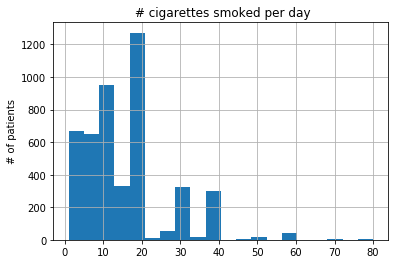

In [87]:
nh.hist_amount('HAR4S');

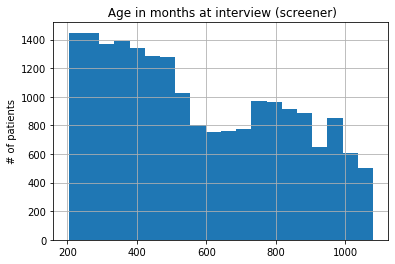

In [88]:
nh.hist_amount('HSAITMOR',outliers=1200);

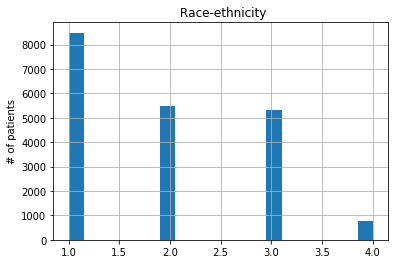

In [89]:
nh.hist_amount('DMARETHN', outliers=25);

In [90]:
cols[cols.description.str.contains('weight|pounds') & ~cols.description.str.contains('(sample|interview|weighting|exam)')]

/usr/local/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,description,variable,position,end position,length
210,Mother's weight calculated in pounds,HFC2S,1300,NaN,1
212,Father's weight calculated in pounds,HFC4S,1302,NaN,1
414,Doctor told control/lose weight for HBP,HAE4B,1601,NaN,1
424,Now controlling or losing weight for HBP,HAE5B,1611,NaN,1
435,Doctor told lose weight for HBC,HAE8B,1622,NaN,1
439,Now losing weight to lower cholesterol,HAE9B,1626,NaN,1
444,"On own for HBC, controlled/lost weight",HAE11B,1631,NaN,1
599,Difficulty lifting or carrying 10 pounds,HAH4,1807,NaN,1
705,Consider self over/under/right weight,HAM11,1964,NaN,1
707,Tried to lose weight in past 12 months,HAM13,1966,NaN,1


In [91]:
cols[cols.description.str.contains('height|cm') & ~cols.description.str.contains('(sample|interview|weighting|exam)')]

/usr/local/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,description,variable,position,end position,length
211,Mother's height calculated in inches,HFC3S,1301,NaN,1
213,Father's height calculated in inches,HFC5S,1303,NaN,1


In [92]:
cols[cols.description.str.contains('stand') ]

,description,variable,position,end position,length
450,If stand still is chest pain relieved,HAF5,1637,NaN,1
466,Leg pain begin while stand still/sitting,HAF15,1658,NaN,1
472,Is leg pain relieved if you stand still,HAF21,1664,NaN,1
478,Problem with ability to speak/understand,HAF27,1670,NaN,1
604,Difficulty standing from armless chair,HAH9,1812,NaN,1


Test Markdown

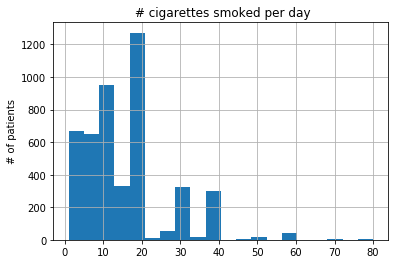

In [93]:
nh.hist_amount('HAR4S');

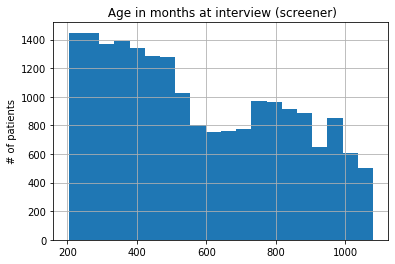

In [94]:
nh.hist_amount('HSAITMOR',outliers=1200);

## Now analyze adult_final

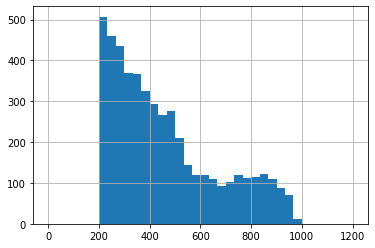

In [95]:
adult_final.HSAITMOR.hist(bins='auto', range=(0,1200))

## Create new fields in adult_final and youth_final

Create new fields (XoY = X/Y) in youth_final and adult_final

In [96]:
oldvariables = [ 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF', 'SPPFEF75', 'SPPEXPIR']

## Create new variables in adult_final final and youth_final

newvariables = ['FEV1OFVC', 'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFVC', 'FEV6OFVC']

def createvariables(df):
    df['FEV1OFVC'] = df.SPPFEV1 / df.SPPFVC
    df['FEV1OFEV6']= df.SPPFEV1 / df.SPPFEV6
    df['PEFROFVC'] = df.SPPPEAK / df.SPPFVC
    df['PEFROFEV6']= df.SPPPEAK / df.SPPFEV6
    df['PEFROFEV1'] = df.SPPPEAK / df.SPPFEV1
    df['FEV3OFVC'] = df.SPPFEV3 / df.SPPFVC
    df['FEV6OFVC'] = df.SPPFEV6 / df.SPPFVC
    return

In [97]:
def createvariables(df):
    df['FEV1OFVC'] = df.SPPFEV1 / df.SPPFVC
    df['FEV1OFEV6']= df.SPPFEV1 / df.SPPFEV6
    df['PEFROFVC'] = df.SPPPEAK / df.SPPFVC
    df['PEFROFEV6']= df.SPPPEAK / df.SPPFEV6
    df['PEFROFEV1'] = df.SPPPEAK / df.SPPFEV1
    df['FEV3OFVC'] = df.SPPFEV3 / df.SPPFVC
    df['FEV6OFVC'] = df.SPPFEV6 / df.SPPFVC
    return
    

createvariables(adult_final) then youth_final

In [98]:
createvariables(adult_final)

In [99]:
createvariables(youth_final)

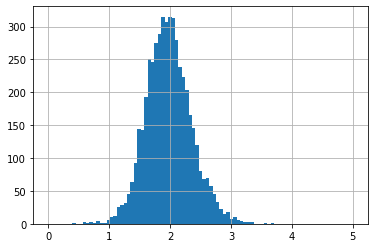

In [100]:
adult_final.PEFROFVC.hist(bins='auto', range=(0,5))

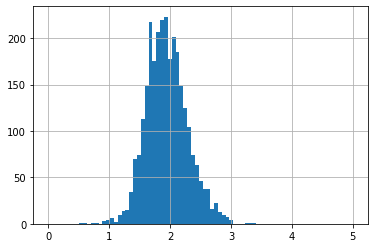

In [101]:
youth_final.PEFROFVC.hist(bins='auto', range=(0,5))

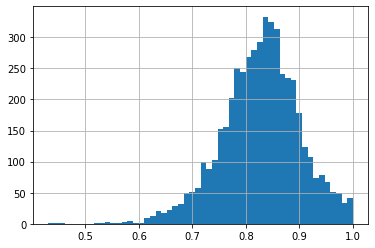

In [102]:
adult_final.FEV1OFVC.hist(bins='auto')

In [103]:
adult_final.describe()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC
count,4944.0,4944.0,4944.000000,4944.0,4944.0,4944.000000,4944.000000,4944.000000,4944.000000,4944.0,...,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000
mean,2.0,2.0,2.003641,2.0,2.0,2.001214,2.001416,2.001416,1.988269,2.0,...,2.040655,2.279531,461.141181,0.827377,0.837894,1.976936,2.003842,2.389732,1.119696,1.151874
std,0.0,0.0,0.147769,0.0,0.0,0.085332,0.099554,0.099554,0.169085,0.0,...,0.823589,0.960234,282.861426,0.073215,0.084317,0.371922,0.396056,0.402936,2.578364,2.575980
min,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,1.000000,2.0,...,1.000000,1.000000,204.000000,0.430769,0.014389,0.437173,0.026089,0.989630,0.689231,0.794219
25%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,...,1.000000,1.000000,287.000000,0.783432,0.803209,1.727486,1.757446,2.120506,0.926235,0.973650
50%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,...,2.000000,3.000000,401.000000,0.831555,0.842880,1.962849,1.997410,2.369035,0.958688,0.991842
75%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,...,3.000000,3.000000,579.250000,0.874832,0.880608,2.210040,2.245542,2.642060,0.985477,0.999456
max,2.0,2.0,8.000000,2.0,2.0,8.000000,9.000000,9.000000,8.000000,2.0,...,3.000000,3.000000,9999.000000,1.000000,1.000422,3.676483,3.588963,4.287374,66.682671,66.682671


In [104]:
adult_final.BMPHT.std()

9.767452144892326

In [105]:
adult_final.describe()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC
count,4944.0,4944.0,4944.000000,4944.0,4944.0,4944.000000,4944.000000,4944.000000,4944.000000,4944.0,...,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000
mean,2.0,2.0,2.003641,2.0,2.0,2.001214,2.001416,2.001416,1.988269,2.0,...,2.040655,2.279531,461.141181,0.827377,0.837894,1.976936,2.003842,2.389732,1.119696,1.151874
std,0.0,0.0,0.147769,0.0,0.0,0.085332,0.099554,0.099554,0.169085,0.0,...,0.823589,0.960234,282.861426,0.073215,0.084317,0.371922,0.396056,0.402936,2.578364,2.575980
min,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,1.000000,2.0,...,1.000000,1.000000,204.000000,0.430769,0.014389,0.437173,0.026089,0.989630,0.689231,0.794219
25%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,...,1.000000,1.000000,287.000000,0.783432,0.803209,1.727486,1.757446,2.120506,0.926235,0.973650
50%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,...,2.000000,3.000000,401.000000,0.831555,0.842880,1.962849,1.997410,2.369035,0.958688,0.991842
75%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,...,3.000000,3.000000,579.250000,0.874832,0.880608,2.210040,2.245542,2.642060,0.985477,0.999456
max,2.0,2.0,8.000000,2.0,2.0,8.000000,9.000000,9.000000,8.000000,2.0,...,3.000000,3.000000,9999.000000,1.000000,1.000422,3.676483,3.588963,4.287374,66.682671,66.682671


In [106]:
print (adult_final.columns.values)

['HAR1' 'HAR23' 'HAR26' 'HAC1E' 'HAC1F' 'HAC1G' 'HAC1O' 'HAL6' 'HAL10'
 'HAL1' 'HAL3' 'HAL5' 'DMARACER' 'DMARETHN' 'DMAETHNR' 'HSSEX' 'HSAGEIR'
 'HSAGEU' 'HXPAXTMR' 'HXPSESSR' 'HSAITMOR' 'HAR4S' 'SPPQ1' 'SPPQ2' 'SPPQ3'
 'SPPQ4' 'SPPQ5' 'SPPMANEU' 'MYPB1' 'MYPB3' 'MYPB11' 'MYPB27A' 'MYPB27B'
 'HSAGEIR_exam' 'HSAGEU_exam' 'HXPAXTMR_exam' 'HXPSESSR_exam' 'HXPEJ6A2'
 'SPPTECH1' 'SPPTRIAL' 'SPPPEAK' 'SPPFEV05' 'SPPFEV1' 'SPPFEV3' 'SPPFEV6'
 'SPPFVC' 'SPPMMEF' 'SPPFEF75' 'SPPTYPE' 'SPPREPRO' 'SPPTIME' 'SPPEXPIR'
 'SPPTEMP' 'HSSEX_exam' 'WTPFHX6' 'MXPAXTMR' 'BMPHT' 'BMPSITHT' 'BMPWT'
 'DMARACER_exam' 'DMARETHN_exam' 'DMAETHNR_exam' 'HSAITMOR_exam'
 'FEV1OFVC' 'FEV1OFEV6' 'PEFROFVC' 'PEFROFEV6' 'PEFROFEV1' 'FEV3OFVC'
 'FEV6OFVC']


In [107]:
print (youth_final.columns.values)

['HYE1G' 'HYE1H' 'HSSEX' 'HSAGEIR' 'HSAGEU' 'DMARACER' 'DMARETHN'
 'DMAETHNR' 'HXPAXTMR' 'HXPSESSR' 'HYG2' 'HYG4' 'HYG7' 'HYG8' 'HYG12'
 'HSAITMOR' 'SPPQ1' 'SPPQ2' 'SPPQ3' 'SPPQ4' 'SPPQ5' 'SPPMANEU' 'MYPB1'
 'MYPB3' 'MYPB11' 'MYPB27A' 'MYPB27B' 'HSAGEIR_exam' 'HSAGEU_exam'
 'HXPAXTMR_exam' 'HXPSESSR_exam' 'HXPEJ6A2' 'SPPTECH1' 'SPPTRIAL'
 'SPPPEAK' 'SPPFEV05' 'SPPFEV1' 'SPPFEV3' 'SPPFEV6' 'SPPFVC' 'SPPMMEF'
 'SPPFEF75' 'SPPTYPE' 'SPPREPRO' 'SPPTIME' 'SPPEXPIR' 'SPPTEMP'
 'HSSEX_exam' 'WTPFHX6' 'MXPAXTMR' 'BMPHT' 'BMPSITHT' 'BMPWT'
 'DMARACER_exam' 'DMARETHN_exam' 'DMAETHNR_exam' 'HSAITMOR_exam'
 'FEV1OFVC' 'FEV1OFEV6' 'PEFROFVC' 'PEFROFEV6' 'PEFROFEV1' 'FEV3OFVC'
 'FEV6OFVC']


In [108]:
youth_final.describe()

,HYE1G,HYE1H,HSSEX,HSAGEIR,HSAGEU,DMARACER,DMARETHN,DMAETHNR,HXPAXTMR,HXPSESSR,...,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC
count,2812.0,2812.0,2812.000000,2812.000000,2812.0,2812.000000,2812.000000,2812.000000,0.0,0.0,...,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000
mean,2.0,2.0,1.522760,11.535562,2.0,1.423898,2.100640,2.272404,NaN,NaN,...,2.100640,2.272404,143.881223,0.880166,0.882731,1.946408,1.952059,2.206381,0.983931,0.996933
std,0.0,0.0,0.499571,2.485636,0.0,0.540996,0.785523,0.962354,NaN,NaN,...,0.785523,0.962354,29.997678,0.060814,0.059107,0.339134,0.338571,0.320986,0.019944,0.007931
min,2.0,2.0,1.000000,8.000000,2.0,1.000000,1.000000,1.000000,NaN,NaN,...,1.000000,1.000000,96.000000,0.316216,0.413063,0.516216,0.583065,1.127809,0.581757,0.765541
25%,2.0,2.0,1.000000,9.000000,2.0,1.000000,1.000000,1.000000,NaN,NaN,...,1.000000,1.000000,119.000000,0.843177,0.846875,1.705966,1.712840,1.987114,0.975569,0.997822
50%,2.0,2.0,2.000000,11.000000,2.0,1.000000,2.000000,3.000000,NaN,NaN,...,2.000000,3.000000,139.000000,0.883417,0.885147,1.925579,1.929688,2.192586,0.989124,0.999312
75%,2.0,2.0,2.000000,14.000000,2.0,2.000000,3.000000,3.000000,NaN,NaN,...,3.000000,3.000000,168.000000,0.921068,0.922429,2.153725,2.161768,2.408977,0.999089,0.999575
max,2.0,2.0,2.000000,16.000000,2.0,3.000000,3.000000,3.000000,NaN,NaN,...,3.000000,3.000000,203.000000,1.000000,1.001080,3.369463,3.372642,3.652091,1.000000,1.000000


# Created other data bases to analyze

# adult m20overb m20overcma f18overb f18overcma

male 20 over. female 18 over; and cma (Caucasian-Mexican American) or b (black)
NOT NEED m20over = adult_final.query('HSAGEIR >=20 & HSSEX == 1’)
NOT NEED f18over = adult_final.query('HSAGEIR >=18 & HSSEX == 2’)
m20overb  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 2'))
m20overcma  = adult_final.query(('HSAGEIR >=20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overcma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overb = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 2 '))
m20overc  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 1'))
m20overma  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 3'))
f18overc = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 1 '))
f18overma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 3 '))

DMARETHN – 1 non-Hispanic white, 2 non-hispanic black, 3 Mexican American, 4 other


In [109]:
m20overb  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 2'))
m20overcma  = adult_final.query(('HSAGEIR >=20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overcma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overb = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 2 '))
m20overc  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 1'))
m20overma  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 3'))
f18overc = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 1 '))
f18overma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 3 '))

In [110]:
f18overb.describe()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC
count,940.0,940.0,940.000000,940.0,940.0,940.0,940.0,940.0,940.000000,940.0,...,940.0,940.0,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,2.0,2.0,2.006383,2.0,2.0,2.0,2.0,2.0,2.001064,2.0,...,2.0,3.0,454.567021,0.840877,0.849786,2.126010,2.149114,2.527313,1.161886,1.192515
std,0.0,0.0,0.195698,0.0,0.0,0.0,0.0,0.0,0.208955,0.0,...,0.0,0.0,365.326660,0.073238,0.083404,0.401784,0.424178,0.426289,3.257199,3.255036
min,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,1.000000,2.0,...,2.0,3.0,216.000000,0.539349,0.014996,0.814485,0.041007,1.252341,0.763021,0.831153
25%,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,...,2.0,3.0,290.000000,0.796417,0.816220,1.877464,1.904474,2.242164,0.930757,0.976982
50%,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,...,2.0,3.0,402.500000,0.844470,0.855362,2.123378,2.150048,2.506843,0.961484,0.994880
75%,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,...,2.0,3.0,535.250000,0.889319,0.893043,2.366512,2.396010,2.790748,0.989477,0.999417
max,2.0,2.0,8.000000,2.0,2.0,2.0,2.0,2.0,8.000000,2.0,...,2.0,3.0,9999.000000,1.000000,1.000000,3.583281,3.588963,4.029915,66.682671,66.682671


## Make dataframes mlt20 and flt18 for b, c, ma and cma combining adult final and youth final

male<20,female<18
mlt20b = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 2'))])
mlt20cma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3)'))])
flt18b = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 2'))])
flt18cma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3)'))])
mlt20c = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 1'))])
mlt20ma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 3'))])
flt18c = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 1'))])
flt18ma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 3'))])

DMARETHN – 1 non-Hispanic white, 2 non-hispanic black, 3 Mexican American, 4 other

In [111]:
mlt20b = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 2'))])
mlt20cma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3)'))])
flt18b = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 2'))])
flt18cma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3)'))])
mlt20c = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 1'))])
mlt20ma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 3'))])
flt18c = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 1'))])
flt18ma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 3'))])

# Create data bases for all male/female cma, black for ratios

Groups for ratios
All male cma  mallcma = pd.concat([m20overcma, mlt20cma])
All male black  mallb = pd.concat([m20overb, mlt20b])
All female cma  fallcma = pd.concat([f18overcma, flt18cma])
All female black  fallb = pd.concat([f18overb, flt18b])
All male c  mallc = pd.concat([m20overc, mlt20c])
All male ma  mallma = pd.concat([m20overma, mlt20ma])
All female c  fallc = pd.concat([f18overc, flt18c])
All female ma  fallma = pd.concat([f18overma, flt18ma])

In [112]:
mallcma = pd.concat([m20overcma, mlt20cma])
mallb = pd.concat([m20overb, mlt20b])
fallcma = pd.concat([f18overcma, flt18cma])
fallb = pd.concat([f18overb, flt18b])
mallc = pd.concat([m20overc, mlt20c])
mallma = pd.concat([m20overma, mlt20ma])
fallc = pd.concat([f18overc, flt18c])
fallma = pd.concat([f18overma, flt18ma])

## Check variable created

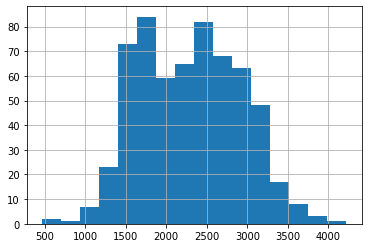

In [113]:
flt18b.SPPFEV1.hist(bins='auto')

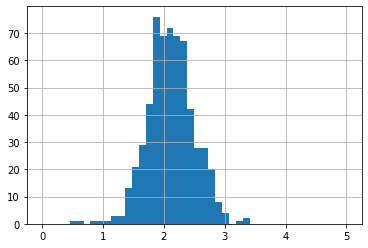

In [114]:
flt18b.PEFROFVC.hist(bins='auto', range=(0,5))

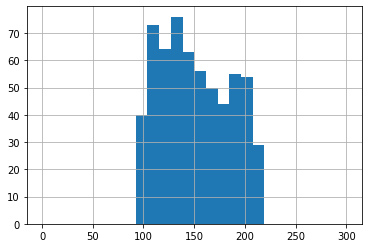

In [115]:
flt18b.HSAITMOR.hist(bins='auto', range=(0,300))

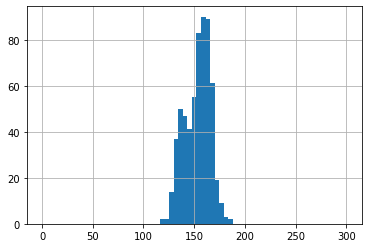

In [116]:
flt18b.BMPHT.hist(bins='auto', range=(0,300))

## Frames to Analyze

framestoanalyze = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, 
                   mlt20b, mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, 
                   mallcma, mallb, mallc, mallma, fallcma, fallb, fallc, fallma]

In [117]:
framestoanalyze = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, 
                   mlt20b, mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, 
                   mallcma, mallb, mallc, mallma, fallcma, fallb, fallc, fallma]

HAD BEEN. framestoanalyze = [m20overb, m20overcma, f18overb, f18overcma, mlt20b, mlt20cma, flt18b, flt18cma, mallcma, mallb, fallcma, fallb]


# framesto analyze names

m20overb.name = 'm20overb'
m20overcma.name = 'm20overcma'
f18overb.name = 'f18overb'
f18overcma.name = 'f18overcma'
mlt20b.name = 'mlt20b'
mlt20cma.name = 'mlt20cma'
flt18b.name = 'flt18b'
flt18cma.name = 'flt18cma'
mallcma.name = 'mallcma'
mallb.name = 'mallb'
fallcma.name = 'fallcma'
fallb.name = 'fallb'
m20overc.name = 'm20overc'
m20overma.name = 'm20ovecma'
f18overc.name = 'f18overc'
f18overma.name = 'f18overma'
mlt20c.name = 'mlt20c'
mlt20ma.name = 'mlt20ma'
flt18c.name = 'flt18c'
flt18ma.name = 'flt18ma'
mallma.name = 'mallma'
mallc.name = 'mallc'
fallma.name = 'fallma'
fallc.name = 'fallc'

In [118]:
m20overb.name = 'm20overb'
m20overcma.name = 'm20overcma'
f18overb.name = 'f18overb'
f18overcma.name = 'f18overcma'
mlt20b.name = 'mlt20b'
mlt20cma.name = 'mlt20cma'
flt18b.name = 'flt18b'
flt18cma.name = 'flt18cma'
mallcma.name = 'mallcma'
mallb.name = 'mallb'
fallcma.name = 'fallcma'
fallb.name = 'fallb'
m20overc.name = 'm20overc'
m20overma.name = 'm20ovecma'
f18overc.name = 'f18overc'
f18overma.name = 'f18overma'
mlt20c.name = 'mlt20c'
mlt20ma.name = 'mlt20ma'
flt18c.name = 'flt18c'
flt18ma.name = 'flt18ma'
mallma.name = 'mallma'
mallc.name = 'mallc'
fallma.name = 'fallma'
fallc.name = 'fallc'

## Variables non-ratio

varsnonratio = [ 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF', 'SPPFEF75', 'SPPEXPIR']

In [119]:
varsnonratio = [ 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF', 'SPPFEF75', 'SPPEXPIR']

In [120]:
print (varsnonratio[0])

SPPFEV1


## Variables ratio

varsratio = ['FEV1OFVC', 'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFVC', 'FEV6OFVC']

In [121]:
varsratio= ['FEV1OFVC', 'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFVC', 'FEV6OFVC']

## Now fit curves

using example in lmfit.github.io/lmfit-py/model.html

import matplotlib.pyplot as plt

In [125]:
import matplotlib.pyplot as plt

## from sklearn.linear_model import LinearRegression

In [138]:
from sklearn.linear_model import LinearRegression

# Linear Regression Age  linear_regage (data, y_var)

  #  height = 'BMPHT'
# age = 'HSAGEIR'/12 - or age in months/12
def linear_regage(data, y_var):
    X = data['HSAITMOR']/12  # to convert to year
    X = np.array(X).reshape(-1, 1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
    print(data.name, ", ",y_var, ", ",lr.intercept_, ", ", lr.coef_, ", ", lr.score(X, y), ", ", data.loc[:,y_var].std(), ", ", data.loc[:,y_var].count())
    return lr.intercept_, lr.coef_
    #. prints intercept, slope, and r squared
   # print (lr.std_)
   # return lr

# reg.coef_

# age = 'HSAGEIR'/12 - or age in months/12
def linear_regage(data, y_var):
    X = data['HSAGEIR']/12  # to convert to year
    X = np.array(X).reshape(-1, 1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
 #   print(data.name, ", ",y_var, ", ",lr.intercept_, ", ", lr.coef_, ", ", lr.score(X, y), ", ", data.loc[:,y_var].std(), ", ", data.loc[:,y_var].count())
 # now returns values rather than print - intercept, slope, R2, std, count
    return lr.intercept_, lr.coef_, lr.score(X, y),  data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [147]:
# age = 'HSAGEIR'/12 - or age in months/12
def linear_regage(data, y_var):
    X = data['HSAITMOR_exam']/12  # to convert to year do months at exam
    X = np.array(X).reshape(-1, 1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
 #   print(data.name, ", ",y_var, ", ",lr.intercept_, ", ", lr.coef_, ", ", lr.score(X, y), ", ", data.loc[:,y_var].std(), ", ", data.loc[:,y_var].count())
 # now returns values rather than print - intercept, slope, R2, std, count
    return lr.intercept_, lr.coef_, lr.score(X, y),  data.loc[:,y_var].std(), data.loc[:,y_var].count()

reg = linear_regage (m20overc,'FEV1OFVC')

In [148]:
for x in varsratio:
    print (x)

FEV1OFVC
FEV1OFEV6
PEFROFVC
PEFROFEV6
PEFROFEV1
FEV3OFVC
FEV6OFVC


## For all frames, for all ratios to analyze, do regression vs age & save in resultsratio

print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation')
for y in framestoanalyze:
Save results in dataframe resultsratio

# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratio = pd.DataFrame(columns = column_names)
resultsratio.name = 'resultsratio'
print (resultsratio)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratio:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ' ', y.name, ', ', xx, ', ', intercept, ', ', slope, ', ', r2, ', ', std, ', ',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratio = resultsratio.append(df2, ignore_index=True)    
print ('at end')
resultsratio.set_index('dfnvarn', inplace=True)
print (resultsratio)
    
    
    
    

In [ ]:
# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratio = pd.DataFrame(columns = column_names)
resultsratio.name = 'resultsratio'
print (resultsratio)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratio:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ' ', y.name, ', ', xx, ', ', intercept, ', ', slope, ', ', r2, ', ', std, ', ',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratio = resultsratio.append(df2, ignore_index=True)    
print ('at end')
resultsratio.set_index('dfnvarn', inplace=True)
print (resultsratio)
    
    

# Now do regression for non-ratios height_age_reg(data, y_var)

def height_age_reg(data, y_var):
# convert agemonths to years
    X_age = data['HSAGEIR']/12
    X_age = np.array(X_age).reshape(-1, 1)
    X_age = np.hstack((X_age, X_age**2))
    X_height = data['BMPHT']**2
    X_height = np.array(X_height).reshape(-1, 1)
    X = np.concatenate((X_age, X_height), axis=1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
    print(data.name, ", ",y_var, ", ",lr.intercept_, ",", lr.coef_, ",", lr.score(X, y), ",",  data.loc[:,y_var].std(), ",",  data.loc[:,y_var].count())
    return data.name, y_var, lr.intercept_, lr.coef_, lr.score(X, y), data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [159]:
def height_age_reg(data, y_var):
# convert agemonths to years
    X_age = data['HSAGEIR_exam']/12
    X_age = np.array(X_age).reshape(-1, 1)
    X_age = np.hstack((X_age, X_age**2))
    X_height = data['BMPHT']**2
    X_height = np.array(X_height).reshape(-1, 1)
    X = np.concatenate((X_age, X_height), axis=1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
    print(data.name, ", ",y_var, ", ",lr.intercept_, ",", lr.coef_, ",", lr.score(X, y), ",",  data.loc[:,y_var].std(), ",",  data.loc[:,y_var].count())
    return data.name, y_var, lr.intercept_, lr.coef_, lr.score(X, y), data.loc[:,y_var].std(), data.loc[:,y_var].count()

# Create Resultsnonratio with all of regression results for all dataframes all nonratio variables

# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "b1", "b2", "b3", "r2", "std", "count"]
# print (column_names)
resultsnonratio = pd.DataFrame(columns = column_names)
resultsnonratio.name = 'resultsnonratio'
print (resultsnonratio)
print ('Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
print ('dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsnonratio:
 #       print(y, " ", xx)
         reg = height_age_reg(y,xx)
         dbname, var, intercept, coef, r2, std, count = reg
         b1, b2, b3, = coef
         print (dbname, ', ', var, ', ',intercept, ', ',b1, ', ',b2, ', ',b3, ', ',r2, ', ',std, ', ',count)
         #  Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count] 

         dfnvarn = y.name + xx   
            
         df2 = {'dfnvarn': [dfnvarn], 'dfname': y.name, 'var': xx, 'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          
         resultsnonratio = resultsnonratio.append(df2, ignore_index=True)
print ('at end')
resultsnonratio.set_index('dfnvarn', inplace=True)
print (resultsnonratio)            

In [163]:
# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "b1", "b2", "b3", "r2", "std", "count"]
# print (column_names)
resultsnonratio = pd.DataFrame(columns = column_names)
resultsnonratio.name = 'resultsnonratio'
print (resultsnonratio)
print ('Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
print ('dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsnonratio:
 #       print(y, " ", xx)
         reg = height_age_reg(y,xx)
         dbname, var, intercept, coef, r2, std, count = reg
         b1, b2, b3, = coef
         print (dbname, ', ', var, ', ',intercept, ', ',b1, ', ',b2, ', ',b3, ', ',r2, ', ',std, ', ',count)
         #  Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count] 

         dfnvarn = y.name + xx   
            
         df2 = {'dfnvarn': [dfnvarn], 'dfname': y.name, 'var': xx, 'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          
         resultsnonratio = resultsnonratio.append(df2, ignore_index=True)
print ('at end')
resultsnonratio.set_index('dfnvarn', inplace=True)
print (resultsnonratio)            

Empty DataFrame
Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count]
Index: []
Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height
dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count
m20overb ,  SPPFEV1 ,  818.5450802528767 , [-2.99633738e+02 -5.98033876e-01  1.18232577e-01] , 0.47872744724171157 , 716.3476358369503 , 479
m20overb ,  SPPFEV1 ,  818.5450802528767 ,  -299.6337379892999 ,  -0.5980338756359238 ,  0.11823257707515089 ,  0.47872744724171157 ,  716.3476358369503 ,  479
m20overb ,  SPPFEV3 ,  1627.8305234507325 , [ 6.87734958e+02 -1.16770116e+02  5.98187873e-02] , 0.007064260018931234 , 3950.8674926269596 , 479
m20overb ,  SPPFEV3 ,  1627.8305234507325 ,  687.7349575626351 ,  -116.77011581939703 ,  0.05981878727325807 ,  0.007064260018931234 ,  3950.8674926269596 ,  479
m20overb ,  SPPFEV6 ,  1401.6771393133859 , [ 7.49324001e+02 -1.20933350e+02

# Now try create new variable %predicted

  #  height = 'BMPHT'
# age = 'HSAGEIR'/12 - or age in months/12
def linear_regagepp(data, y_var):
    X = data['HSAGEIR']/12  # to convert to year
    XOR = X
    X = np.array(X).reshape(-1, 1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
    print(data.name, ", ",y_var, ", ",lr.intercept_, ", ", lr.coef_, ", ", lr.score(X, y), ", ", data.loc[:,y_var].std(), ", ", data.loc[:,y_var].count())
    return lr.intercept_, lr.coef_
# create new variable percent predicted - later need have variable y_var."PP"
#    newvar = y_var + 'PP'
 #   data[newvar] = y / (lr.intercept_ + lr.coef_ * data['HSAGEIR']/12) * 100
#. prints intercept, slope, and r squared
   # print (lr.std_)
   # return lr

# reg.coef_

In [131]:
  #  height = 'BMPHT'
# age = 'HSAGEIR'/12 - or age in months/12
def linear_regagepp(data, y_var):
    X = data['HSAGEIR']/12  # to convert to year
    XOR = X
    X = np.array(X).reshape(-1, 1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
    print(data.name, ", ",y_var, ", ",lr.intercept_, ", ", lr.coef_, ", ", lr.score(X, y), ", ", data.loc[:,y_var].std(), ", ", data.loc[:,y_var].count())
    return lr.intercept_, lr.coef_
# create new variable percent predicted - later need have variable y_var."PP"
    newvar = y_var + 'PPP'
    data[newvar] = y / (lr.intercept_ + lr.coef_ * data['HSAGEIR']/12)
    data[newvar] = y / (lr.intercept_ + lr.coef_ * data['HSAGEIR']/12)
#. prints intercept, slope, and r squared
   # print (lr.std_)
   # return lr

# reg.coef_

Test trying percent predicted variable

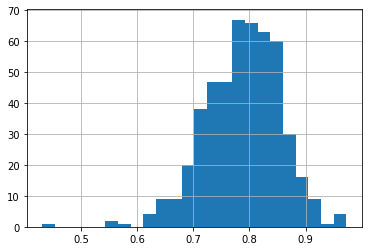

In [151]:
m20overc.FEV1OFVC.hist(bins='auto')

In [178]:
m20overc.FEV1OFVCPP.hist(bins='auto')

AttributeError: 'DataFrame' object has no attribute 'FEV1OFVCPP'

In [153]:
std = m20overc.FEV1OFVC.std()
mean = m20overc.FEV1OFVC.mean()
ratio = std / mean # m20overc.FEV1OFVC.std()/m20overc.FEV1OFVC.mean()
print (mean, ratio, ratio* 1.645, mean - (ratio*1.645))
print (.876 * mean)

0.788236891255396 0.08652781139466979 0.14233824974423182 0.6458986415111642
0.6904955167397269


says mean FEV1/FVC .788, lower limit if use std for all data .645

The std is smaller for %predicted than for actual value
so to get 5% lower limit can use %predicted - 1.645 * std

In [154]:
std = m20overc.FEV1OFVCPP.std()
mean = m20overc.FEV1OFVCPP.mean()
ratio = std/mean # m20overc.FEV1OFVCPP.std()/m20overc.FEV1OFVCPP.mean()
print (mean, ratio, ratio*1.645, mean - (ratio*1.645))

AttributeError: 'DataFrame' object has no attribute 'FEV1OFVCPP'

says mean FEV1/FVC %pred is 100% and lower limit .876 of that
if use prior mean FEV1/FVC of .788, .876 of that is .69 which is higher than .645

In [155]:
print(.788*.876)

0.690288


In [156]:
Try saving variables to array

SyntaxError: invalid syntax (<ipython-input-156-49ccb33d9253>, line 1)

In [157]:
print (m20overc.name)
print (varsratio[1])
dfvar = m20overc.name + varsratio[1]
print (dfvar)

AttributeError: 'DataFrame' object has no attribute 'name'

In [129]:
print (resultsratio)

Empty DataFrame
Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count]
Index: []


new variable %pred ratios

data.loc['m20overbFEV1OFVC']

In [130]:
print (dfname)

NameError: name 'dfname' is not defined

# Now do regression for non-ratios height_age_reg(data, y_var)

# Height_age_reg regression y = b0 + b1 * age + b2 * age * age + b3 * height * height

def height_age_reg(data, y_var):
# convert agemonths to years
    X_age = data['HSAGEIR']/12
    X_age = np.array(X_age).reshape(-1, 1)
    X_age = np.hstack((X_age, X_age**2))
    X_height = data['BMPHT']**2
    X_height = np.array(X_height).reshape(-1, 1)
    X = np.concatenate((X_age, X_height), axis=1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
    print(data.name, ", ",y_var, ", ",lr.intercept_, ",", lr.coef_, ",", lr.score(X, y), ",",  data.loc[:,y_var].std(), ",",  data.loc[:,y_var].count())

In [161]:
def height_age_reg(data, y_var):
# convert agemonths to years
    X_age = data['HSAGEIR']/12
    X_age = np.array(X_age).reshape(-1, 1)
    X_age = np.hstack((X_age, X_age**2))
    X_height = data['BMPHT']**2
    X_height = np.array(X_height).reshape(-1, 1)
    X = np.concatenate((X_age, X_height), axis=1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
    print(data.name, ", ",y_var, ", ",lr.intercept_, ",", lr.coef_, ",", lr.score(X, y), ",",  data.loc[:,y_var].std(), ",",  data.loc[:,y_var].count())
    return data.name, y_var, lr.intercept_, lr.coef_, lr.score(X, y), data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [162]:
height_age_reg(m20overb, 'SPPFEV1')

m20overb ,  SPPFEV1 ,  818.5450802528767 , [-2.99633738e+02 -5.98033876e-01  1.18232577e-01] , 0.47872744724171157 , 716.3476358369503 , 479


('m20overb',
 'SPPFEV1',
 818.5450802528767,
 array([-2.99633738e+02, -5.98033876e-01,  1.18232577e-01]),
 0.47872744724171157,
 716.3476358369503,
 479)

# Now do regression for all dataframes all nonratio variables & save resultsnonratio

# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "b1", "b2", "b3", "r2", "std", "count"]
# print (column_names)
resultsnonratio = pd.DataFrame(columns = column_names)
resultsnonratio.name = 'resultsnonratio'
print (resultsnonratio)
print ('Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
print ('dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsnonratio:
 #       print(y, " ", xx)
         reg = height_age_reg(y,xx)
         dbname, var, intercept, coef, r2, std, count = reg
         b1, b2, b3, = coef
         print (dbname, ', ', var, ', ',intercept, ', ',b1, ', ',b2, ', ',b3, ', ',r2, ', ',std, ', ',count)
         #  Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count] 

         dfnvarn = y.name + xx   
            
         df2 = {'dfnvarn': [dfnvarn], 'dfname': y.name, 'var': xx, 'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          
         resultsnonratio = resultsnonratio.append(df2, ignore_index=True)

In [163]:
# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "b1", "b2", "b3", "r2", "std", "count"]
# print (column_names)
resultsnonratio = pd.DataFrame(columns = column_names)
resultsnonratio.name = 'resultsnonratio'
print (resultsnonratio)
print ('Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
print ('dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsnonratio:
 #       print(y, " ", xx)
         reg = height_age_reg(y,xx)
         dbname, var, intercept, coef, r2, std, count = reg
         b1, b2, b3, = coef
         print (dbname, ', ', var, ', ',intercept, ', ',b1, ', ',b2, ', ',b3, ', ',r2, ', ',std, ', ',count)
         #  Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count] 

         dfnvarn = y.name + xx   
            
         df2 = {'dfnvarn': [dfnvarn], 'dfname': y.name, 'var': xx, 'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          
         resultsnonratio = resultsnonratio.append(df2, ignore_index=True)

Empty DataFrame
Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count]
Index: []
Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height
dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count


NameError: name 'framestoanalyze' is not defined

In [164]:
print (resultsnonratio)

Empty DataFrame
Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count]
Index: []


# Now need calculate percent predicted variables

#        varpp = xx + 'PP'
 #       print (var, ' ', dfvar, ' ', xx, ' ', varpp)
    
 #   I think will need do for each variable unless can indirct       
 #  create new variable with PP at end = variable / predicted, where predicted = intercept + slope * Agemonth/12   
 #       y.varpp = y.xx / (intercept + slope * y.HSAGEIR/12)
 #       print (y.varpp.mean(), " ", y.varpp.std())
    
    Need cycle through all rows in results ratio, take the database and variable and 

for each data base
  create new variables PP pulling from resultsvar. and results nonvar
  first resultsvar
  

# Try for one variable, one df

In [165]:

print (resultsratio)

Empty DataFrame
Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count]
Index: []


In [166]:
resultsratio.slope

Series([], Name: slope, dtype: object)

In [167]:
resultsratio.loc['m20overbFEV1OFVC']

KeyError: 'm20overbFEV1OFVC'

def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
  #  print (vn)
    resultsratio.loc[['m20overbFEV1OFVC'], ['intercept']] 
  #  print (resultsratio.loc['m20overbFEV1OFVC', 'intercept'])
  #  print (resultsratio.loc[vn, 'slope'])
    a =  resultsratio.loc['m20overbFEV1OFVC', 'intercept'] 
    b = resultsratio.loc[vn, 'slope']
  #  print (a)
  #  print ('b ', b)
    df['FEV1OFVCPP'] = df.FEV1OFVC / (a + b * (df.HSAGEIR / 12))
  #  df['FEV1OFVCPP'] = df. FEV1OFVC / (resultsratio.loc [vn,intercept] + resultsratio.loc[vn,slope]) # * df.HSAGEIR/12)
  #  df['FEV1OFVCPP'] = df.FEV1OFVC / 100
  def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
  #  print (vn)
  #  resultsratio.loc[['m20overbFEV1OFVC'], ['intercept']] 
  #  print (resultsratio.loc['m20overbFEV1OFVC', 'intercept'])
  #  print (resultsratio.loc[vn, 'slope'])
  #  a =  resultsratio.loc['m20overbFEV1OFVC', 'intercept'] 
   # b = resultsratio.loc[vn, 'slope']
  #  print (a)
  #  print ('b ', b)
 #   df['FEV1OFVCPP'] = df.FEV1OFVC / (a + b * (df.HSAGEIR / 12))
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))


In [168]:
def createvarsppone(df):
    vn = df.name + 'FEV1OFVC'
  #  print (vn)
  #  resultsratio.loc[['m20overbFEV1OFVC'], ['intercept']] 
  #  print (resultsratio.loc['m20overbFEV1OFVC', 'intercept'])
  #  print (resultsratio.loc[vn, 'slope'])
  #  a =  resultsratio.loc['m20overbFEV1OFVC', 'intercept'] 
   # b = resultsratio.loc[vn, 'slope']
  #  print (a)
  #  print ('b ', b)
 #   df['FEV1OFVCPP'] = df.FEV1OFVC / (a + b * (df.HSAGEIR / 12))
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    print (vn)

In [169]:
createvarsppone(m20overb)

KeyError: 'm20overbFEV1OFVC'

def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PP']= df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV6'
    df['PEFROFEV6PP']= df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV1'
    df['PEFROFEV1PP'] = df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV3OFVC'
    df['FEV3OFVCPP'] = df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV6OFVC'
    df['FEV6OFVCPP'] = df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))

In [175]:
def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PP']= df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV6'
    df['PEFROFEV6PP']= df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV1'
    df['PEFROFEV1PP'] = df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV3OFVC'
    df['FEV3OFVCPP'] = df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV6OFVC'
    df['FEV6OFVCPP'] = df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))

# The following gives message but works

now want to do for all ratio dataframes

In [176]:
createvarspp(m20overb)

KeyError: 'm20overbFEV1OFVC'

In [177]:
m20overb.describe()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,DMAETHNR_exam,HSAITMOR_exam,PEFROVERFVC,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC
count,479.0,479.0,479.0,479.0,479.0,479.0,479.0,479.0,479.000000,479.0,...,479.0,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.987474,2.0,...,3.0,452.375783,2.122294,0.824181,0.836464,2.122294,2.153263,2.568511,1.001031,1.034814
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111333,0.0,...,0.0,468.845329,0.387098,0.071030,0.073097,0.387098,0.397138,0.386982,1.144854,1.142839
min,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000000,2.0,...,3.0,240.000000,0.584980,0.440580,0.032400,0.584980,0.103377,1.304937,0.811878,0.874781
25%,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,...,3.0,302.000000,1.877990,0.784355,0.800738,1.877990,1.922980,2.329390,0.927933,0.974449
50%,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,...,3.0,383.000000,2.141267,0.830542,0.842314,2.141267,2.167587,2.565379,0.954855,0.989978
75%,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,...,3.0,506.000000,2.371775,0.869916,0.879625,2.371775,2.406732,2.803676,0.979400,0.999222
max,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,...,3.0,9999.000000,3.272295,0.999701,1.000000,3.272295,3.279118,3.612308,25.990643,25.990643


In [173]:
plt.scatter(X, y)

NameError: name 'X' is not defined

In [174]:
from scipy import stats

# now plot y actual value (e.g. of PEFR/FVC) vs predicted PEFR/FVC
first need new value PEFROFVCPRED = the regression for predicted
  and PEFROFVCPP - %predicted of PEF
then do linear regression of x = PEFROFVCPRED and y = PEFROFVCROFVC
do scatter plot of X,y to see if 
do histogram of PEFROFVC
do linear regression and scatter plot of PEFROFVCPP (y) versus age to see if the SDev varies by age
need see if normal distribution of 

Also have new variables PEFRPP/FVCPP - or PEFRPP-FVCPP
  then see if one or other has normal distribution and what is variance
  ratio should be centered around 1; and difference around 0
  I have been using PEFRPP-FVCPP >30 as indicator, but ratio may be better (e.g. if more than 1.3,

do plot of actual FEV1 vs predicted FEV1 ( x vs y)
to get lower limit, need standard deviation - first see if normal distribution
  then fit to gaussian and sdev from that
  
  need check whether same sdev for each age; whether same for each height, for each height**2, for each predicted FEV1
    by categories


We're trying to replicate and update Hankinson

We're trying to replicate and update Hankinson

# Now need determine LLN - ?used std

Determine lower limit of normal
  can do this if get starndard deviation for each variable
Assuming normal distribution get standard deviation for each variable
Could create variable as %predicted, then do normal distribution of the %predicteds
Would want to check if the standard deviation varied by age ?height
Alternatively is there a way to get lower 5%
